## Sorting

### 1.Quick Sort 
`sentry division`, `recursive`

Divide and conquer: filter the original array into 2 sub-arrays, in which the data of the first array should be smaller than the data of the latter one, and then recursively sort the 2 sub-arrays. Specifically: 
1. find a random element $x_b$ as the base, which should be kept still and will only be exchanged until 2 sentries meet each other.
   1. set 2 sentries(pointers) at the start and the end, denoted as $p_s$ and $p_e$, respectively; 
      - $p_s$ goes from left to right, aiming to find an element $x_l$ larger than the base;
      - $p_e$ goes from right to left, aiming to find an element $x_s$ smaller than the base;
   2. exchange $x_s$ and $x_l$;
   3. continue to move these 2 sentries, repeat the process above;
2. until $p_s$ and $p_e$ meet each other, exchange $x_b$ and $arr[p_s]$ (*i.e.*, $arr[p_e]$).  
3. recursively call the function to quick sort the 2 sub-array, and at last we will get a entirely ordered array.

In [1]:
import random
class Solution:
    def MySort(self , arr ):
        self.randomQuicksort(arr, 0, len(arr)-1)
        return arr
    
    def randomPartition(self, arr, l, r):
        pivot = random.randint(l, r)
        arr[pivot], arr[r] = arr[r], arr[pivot]
        i = l - 1
        for j in range(l, r):
            if arr[j] < arr[r]:
                i += 1
                arr[j], arr[i] = arr[i], arr[j]
        i += 1
        arr[i], arr[r] = arr[r], arr[i]
        return i
    
    def randomQuicksort(self, arr, l, r):
        if l >= r:
            return
        mid = self.randomPartition(arr, l, r)
        self.randomQuicksort(arr, l, mid-1)
        self.randomQuicksort(arr, mid+1, r)

In [10]:
ss = Solution()
nums = [20,24,15,12,1,2,3,54,6]
ss.MySort(nums)
print(nums)

[1, 2, 3, 6, 12, 15, 20, 24, 54]


### 2.Merging Sort

归并排序是把待排序序列分为若干个子序列，每个子序列是有序的。然后再把有序子序列合并为整体有序序列
![](https://www.coderarticles.com/wp-content/uploads/2019/01/merge_sort_algorithm.png)

In [1]:
class Solution:
    def MySort(self , arr ):
        if len(arr) <= 1:
            return arr
        mid = len(arr) // 2
        return self.merge(self.MySort(arr[:mid]), self.MySort(arr[mid:]))
    
    def merge(self, left, right):
        result = []
        while len(left) >0 and len(right) > 0:
            if left[0] <= right[0]:
                result.append(left.pop(0))
            else:
                result.append(right.pop(0))
        result += left
        result += right
        return result

In [38]:
ss = Solution()
nums = [20,24,15,12,1,2,3,54,6]
nums = ss.MySort(nums)
print(nums)

[1, 2, 3, 6, 12, 15, 20, 24, 54]


Python has a module that specifically provides a merge sort method called the `heapq` module, so we only need to import the decomposed results into this method

In [40]:
from heapq import merge

def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    return list(merge(arr[:mid], arr[mid:]))

#### Complexity Analysis

- Time Complexity: $O(N \log N)$;
- Space Complexity: with a temporary array, $O(N)$; w/o a temporary array, $O(1)$;
- Stable: the relative order of the elements doesn't change during sorting, thus heap sort is a stable sort method.

### 3. Heap sort
(1) The heap tree is a complete binary tree;

(2) The value of a node in the heap tree is always not greater than or not less than the value of its child nodes;

(3) The subtree of each node in the heap tree is a heap tree.

Max-heap: The maximum value in the heap is always at the root node (min-heap is used in the priority queue: the minimum value in the heap is at the root node)

In [ ]:
from typing import List
def build(arr:List[int], root, end):
    while True:
        child = 2 * root + 1 # 左子节点的位置
        if child > end: # 若左子节点超过了最后一个节点，则终止循环
            break
        if (child + 1 <= end) and (arr[child + 1] > arr[child]): # 若右子节点在最后一个节点之前，并且右子节点比左子节点大，则我们的孩子指针移到右子节点上
            child += 1
        if arr[child] > arr[root]: # 若最大的孩子节点大于根节点，则交换两者顺序，并且将根节点指针，移到这个孩子节点上
            arr[child], arr[root] = arr[root], arr[child]
            root = child
        else:
            break

def heap_sort(arr:List[int]):
    n = len(arr)
    first_root = n // 2 - 1 # 确认最深最后的那个根节点的位置
    for root in range(first_root, -1, -1): # 由后向前遍历所有的根节点，建堆并进行调整
        build(arr, root, n - 1)
    print("Heap Array: ", arr)
        
    for end in range(n - 1, 0, -1): # 调整完成后，将堆顶的根节点与堆内最后一个元素调换位置，此时为数组中最大的元素，然后重新调整堆，将最大的元素冒到堆顶。依次重复上述操作
        arr[0], arr[end] = arr[end], arr[0]
        build(arr, 0, end - 1)
        
if __name__ == "__main__":
    import random
    random.seed(54)
    arr = [random.randint(0,100) for _ in range(10)]
    print("Original Array: ", arr)
    heap_sort(arr)
    print("Sorted Array: ", arr)

### 4. Insertion Sort
For unsorted data, scan from back to front in the sorted sequence, find the corresponding position and insert
#### Implementation steps
- starting from the first element, the element can be considered sorted;
- Take out the new element, and scan from the back to the front in the sorted element sequence (the sequence before the new element);
- If the element in the sorted sequence is greater than the new element, move the sorted element back;
- Repeat step 3 until you find the position where the sorted element is less than or equal to the new element;
- Insert the new element one position after the position;
- Repeat steps 2~5.

In [56]:
from typing import List

def insertion_sort(arr: List[int]):
    length = len(arr)
    if length <= 1:
        return
    
    for i in range(1, length):
        value = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > value:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = value

![gif](https://image-static.segmentfault.com/961/819/961819017-5ec37259eaa75_fix732)


- **Time complexity**: 
  - On average, insertion sort takes about $(N^2)/4$ comparison and $(N^2)/4$ exchanges. 
  - Worst case (completely reversed) need $(N^2)/2$ comparison and $(N^2)/2$ exchanges. 
  - Best case (completely sorted) needs $N-1$ comparison and $0$ exchanges. 

- space complexity

The space complexity is the memory space occupied by the temporary variable when exchanging elements, it has nothing to do with the data size, the space complexity is $O\left( 1 \right)$

- Stability

During the sorting process, the relative positions of the same elements remain unchanged, so the insertion sort is a stable sort.

### 5.Bubble Sort


In [2]:
from typing import List

def bubbleSort(arr: List[int]) -> List[int]:
    if len(arr) <= 1:
        return 
    for i in range(len(arr)):
        is_made_swap = False
        for j in range(len(arr)-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                is_made_swap = True
        if not is_made_swap:
            break

### 6. Selection sort
First find the smallest (largest) element in the unsorted sequence, store it at the beginning of the sorted sequence, then continue to find the smallest (largest) element from the remaining unsorted elements, and then put it at the end of the sorted sequence.

The main advantage of selection sort is related to data movement.
- If an element is in the correct final position, it will not be moved.
- Selection sort swaps a pair of elements each time, at least one of them will be moved to its final position, so sorting a list of n elements performs at most n-1 swaps in total.
- Among all sorting methods that rely entirely on swapping to move elements, selection sort is a very good one.

In [8]:
def selectSort(arr):
    for j in range(0, len(arr)-1):
        min_idx = j
        for i in range(j+1, len(arr)):
            if arr[i] < arr[min_idx]:
                min_idx = i
        if j != min_idx:
            arr[min_idx], arr[j] = arr[j], arr[min_idx] 

In [ ]:
if __name__ == '__main__':
    alist = [54, 26, 93, 17, 77, 31, 44, 55, 20]
    print("Original Array：%s" % alist)
    selectSort(alist)
    print("Sorted Array：%s" % alist)

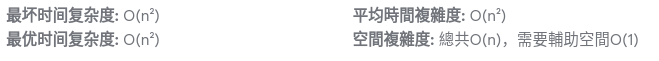

### 7. Counting sort
Counting Sort is not a sorting algorithm based on comparison. Its core is to convert the input data value into a key and store it in the additional array space

A linear time complexity sorting that requires input data to be integers with a certain range

The basic idea is: given each element x in the input sequence, determine the number of elements whose value is less than or equal to x in the sequence, and then store x directly in the correct position of the final sorted sequence.

#### Algorithm Implementation Steps
- Apply for additional space according to the difference range between the largest element and the smallest element in the collection to be sorted;
- Traverse the collection to be sorted, and record the number of occurrences of each element in the extra space corresponding to the element value;
- Calculate the data in the extra space to get the correct position of each element;
- Move each element of the collection to be sorted to the calculated correct position

In [ ]:
from typing import List
    
def counting_sort(arr:List[int]):
    ma=mi=0
    mi = min(arr)
    ma = max(arr)
    count = [0] * (ma-mi+1)
    for index in arr:
        count[index-mi] += 1
    idx = 0
    for i in range(ma-mi+1):
        for j in range(count[i]):
            arr[idx] = i+mi
            idx += 1
    
if __name__ == '__main__':
    import random
    random.seed(54)
    arr = [random.randint(0,100) for _ in range(10)]
    print("Original Array: ", arr)
    counting_sort(arr)
    print("Sorted Array: ", arr)

### 8. Bucket Sort

Store the elements in the same value range in the collection to be sorted into the same bucket, which is in an ordered state from the value range.

**Sort the elements in each bucket, then the set of elements in all buckets is sorted**

Bucket sorting is an extended version of counting sort. Counting sorting can be seen as storing only the same elements in each bucket, while bucket sorting stores a certain range of elements in each bucket.

#### Implementation steps
- Determine the number of buckets to apply for according to the difference range and mapping rules between the largest element and the smallest element in the set to be sorted;
- Traverse the sorted sequence and put each element into the corresponding bucket;
- Sort buckets that are not empty;
- Access the buckets in order, and put the elements in the bucket back to the corresponding positions in the original sequence to complete the sorting.

## 88. 合并两个有序数组
给你两个有序整数数组 nums1 和 nums2，请你将 nums2 合并到 nums1 中，使 nums1 成为一个有序数组。

初始化 nums1 和 nums2 的元素数量分别为 m 和 n 。你可以假设 nums1 的空间大小等于 m + n，这样它就有足够的空间保存来自 nums2 的元素。

示例 1：
```
输入：nums1 = [1,2,3,0,0,0], m = 3, nums2 = [2,5,6], n = 3
输出：[1,2,2,3,5,6]
```
示例 2：
```
输入：nums1 = [1], m = 1, nums2 = [], n = 0
输出：[1]
 ```

提示：
```
nums1.length == m + n
nums2.length == n
0 <= m, n <= 200
1 <= m + n <= 200
-109 <= nums1[i], nums2[i] <= 109
```


In [12]:
from typing import List

def bucket_sort(arr:List[int]):
    ma, mi = max(arr), min(arr)
    bucket_range = (ma-mi)/len(arr)
    count_list = [[] for i in range(len(arr)+1)]
    for i in arr:
        count_list[int((i-mi)//(bucket_range))].append(i)
    arr.clear()
    for i in count_list:
        for j in sorted(i):
            arr.append(j)

if __name__ == '__main__':
    import random
    random.seed(54)
    arr = [random.randint(0,100) for _ in range(10)]
    print("原始数据：", arr)
    bucket_sort(arr)
    print("桶排序结果：", arr)

原始数据： [17, 56, 71, 38, 61, 62, 48, 28, 57, 42]
[[17], [], [28], [38], [42], [48], [], [56, 57], [61, 62], [71], []]
桶排序结果： [17, 28, 38, 42, 48, 56, 57, 61, 62, 71]


## 8.基数排序(Radix Sort)

将所有待比较数值统一为同样的数位长度，数位较短的数前面补零。按照低位先排序，分别放入10个队列中

 ### 方法一：快速排序

**主要思想**：

通过划分将待排序的序列分成前后两部分，其中前一部分的数据都比后一部分的数据要小
然后再递归调用函数对两部分的序列分别进行快速排序，以此使整个序列达到有序

**基本思路：**

我们定义函数` randomized_quicksort(nums, l, r)` 为对 `nums `数组里 `[l,r]` 的部分进行排序
每次先调用 `randomized_partition` 划分函数对 `nums `数组里 `[l,r]` 的部分进行划分，并返回**分界值的下标** `pos`
然后按上述将的递归调用`randomized_quicksort(nums, l, pos - 1) `和 `randomized_quicksort(nums, pos + 1, r)` 即可。

**核心：划分函数的实现**

划分函数一开始需要确定一个分界值（主元 `pivot)`，然后再进行划分。
主元的选取有很多种方式，这里我们采用随机的方式，对当前划分区间 `[l,r]` 里的数**等概率随机**一个作为我们的主元，再将主元放到区间末尾，进行划分。

整个划分函数 `partition `主要涉及两个指针 `i` 和 `j`，一开始` i = l - 1，j = l`。
我们需要实时维护两个指针使得任意时候，对于任意数组下标 `k`，我们有如下条件成立：
![image.png](attachment:image.png)
我们每次移动指针 `j`，如果 ${nums}[j]> pivot$，我们只需要继续移动指针 `j` ，即能使上述三个条件成立
否则我们需要将指针 `i` 加一，然后交换$ {nums}[i]$ 和 ${nums}[j]$，再移动指针 `j` 才能使得三个条件成立。

当 `j` 移动到 `r-1` 时结束循环，此时我们可以由上述三个条件知道 `[l,i]` 的数都小于等于主元 `pivot`，``[i+1,r-1]` 的数都大于主元 `pivot`
那么我们只要交换 ${nums}[i+1]$和  $ {nums}[r]$ ，即能使得 `[l,i+1]` 区间的数都小于 `[i+2,r]` 区间的数，完成一次划分，且分界值下标为` i+1`，返回即可。

**复杂度分析**

时间复杂度：基于随机选取主元的快速排序时间复杂度为期望$ O((m+n)\log (m+n))$

空间复杂度：$O(h)$,  其中 $h$  为快速排序递归调用的层数,  最坏情况下需 $O((m+n))$ 的空间,   最优情况下每次都平衡,  空间复杂度为 $O(\log (m+n))$。

In [1]:
from typing import List

class Solution:
    def merge(self, nums1: List[int], m: int, nums2: List[int], n: int) -> None:
        """
        Do not return anything, modify nums1 in-place instead.
        """
        nums1 = nums1[:m] + nums2
        self.randomized_quicksort(nums1, 0, len(nums1)-1)
        return nums1
    
    def randomized_partition(self, nums: List[int], l:int, r:int):
        import random as rd
        pivot = rd.randint(l,r)
        nums[pivot], nums[r] = nums[r], nums[pivot]
        i = l - 1
        for j in range(l, r):
            if nums[j] < nums[r]:
                i += 1
                nums[j], nums[i] = nums[i], nums[j]
        i += 1
        nums[i], nums[r] = nums[r], nums[i]
        return i
    def randomized_quicksort(self, nums: List[int], l: int, r: int):
        if l >= r:
            return
        mid = self.randomized_partition(nums, l, r)
        self.randomized_quicksort(nums, l, mid-1)
        self.randomized_quicksort(nums, mid+1, r)

#### 直接合并后排序
复杂度同快速排序
```python
nums1[m:] = nums2
nums1.sort()
```

### 双指针

**复杂度分析**

时间复杂度：$O(m+n)$
指针移动单调递增，最多移动 $m+n$ 次，因此时间复杂度为 $O(m+n)$。

空间复杂度：$O(m+n)$
需要建立长度为 $m+n$ 的中间数组 $\textit{sorted}$。


In [ ]:
from typing import List

class Solution:
    def merge(self, nums1: List[int], m: int, nums2: List[int], n: int) -> None:
        """
        Do not return anything, modify nums1 in-place instead.
        """
        sorted = []
        p1, p2 = 0, 0
        while p1 < m or p2 < n:
            if p1 == m:
                sorted.append(nums2[p2])
                p2 += 1
            elif p2 == n:
                sorted.append(nums1[p1])
                p1 += 1
            elif nums1[p1] < nums2[p2]:
                sorted.append(nums1[p1])
                p1 += 1
            else:
                sorted.append(nums2[p2])
                p2 += 1
        nums1[:] = sorted  

### 逆向双指针
算法

方法二中，之所以要使用临时变量，是因为如果直接合并到数组 $\textit{nums}_1$中，$\textit{nums}_1$中的元素可能会在取出之前被覆盖。那么如何直接避免覆盖 $\textit{nums}_1$中的元素呢？观察可知，$\textit{nums}_1$的后半部分是空的，可以直接覆盖而不会影响结果。因此可以指针设置为从后向前遍历，每次取两者之中的较大者放进 $\textit{nums}_1$的最后面。

**复杂度分析**

时间复杂度：$O(m+n)$
指针移动单调递增，最多移动 $m+n$ 次，因此时间复杂度为 $O(m+n)$。

空间复杂度：$O(1)$

In [ ]:
from typing import List

class Solution:
    def merge(self, nums1: List[int], m: int, nums2: List[int], n: int) -> None:
        """
        Do not return anything, modify nums1 in-place instead.
        """
        p1, p2 = m-1, n-1
        tail = m + n -1
        while p1 > -1 or p2 > -1:
            if p1 == -1:
                nums1[tail] = nums2[p2]
                p2 -= 1
            elif p2 == -1:
                nums1[tail] = nums1[p1]
                p1 -= 1
            elif nums1[p1] > nums2[p2]:
                nums1[tail] = nums1[p1]
                p1 -= 1
            elif nums2[p2] >= nums1[p1]:
                nums1[tail] = nums2[p2]
                p2 -= 1
            tail -= 1

In [3]:
ss = Solution()
nums1 = [1,2,3,0,0,0]
m = 3
nums2 = [2,5,6]
n = 3
ss.merge(nums1, m, nums2, n)
print(nums1)

[1, 2, 3, 0, 0, 0]


## 最小的K个数
题目描述

给定一个数组，找出其中最小的K个数。例如数组元素是4,5,1,6,2,7,3,8这8个数字，则最小的4个数字是1,2,3,4。

如果K>数组的长度，那么返回一个空的数组

示例：
```
输入： [4,5,1,6,2,7,3,8],4 
return: [1,2,3,4]
```

In [ ]:
# -*- coding:utf-8 -*-
class Solution:
    def GetLeastNumbers_Solution(self, tinput, k):
        # write code here
        
        if K>len(tinput):
            return []
        for j in range(0, len(tinput)-1):
            min_idx = j
            for i in range(j+1, len(tinput)):
                if tinput[i] < tinput[min_idx]:
                    min_idx = i
            if j != min_idx:
                tinput[j], tinput[min_idx] = tinput[min_idx], tinput[j]
        return tinput[:k]

In [ ]:
ss = Solution()
nums = [4,5,1,6,2,7,3,8]
K = 4
ss.GetLeastNumbers_Solution(nums, K)